CHURN PREDICTION

In [46]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [6]:
d_f=pd.read_csv('dataset-B.csv')
d_f.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
d_f.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
d_f.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
d_f['TotalCharges']=d_f['TotalCharges'].fillna(d_f['TotalCharges'].median())

In [14]:
d_f.duplicated().sum()

0

In [16]:
d_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


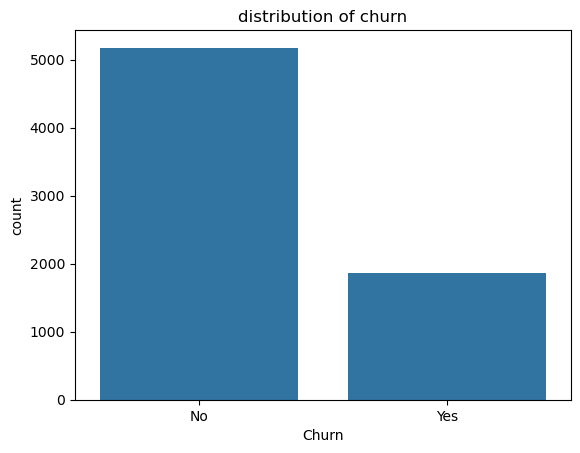

In [18]:
sns.countplot(x='Churn',data=d_f)
plt.title("distribution of churn")
plt.show()

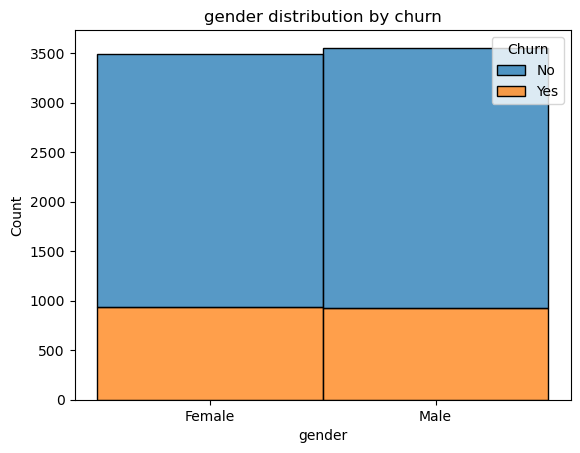

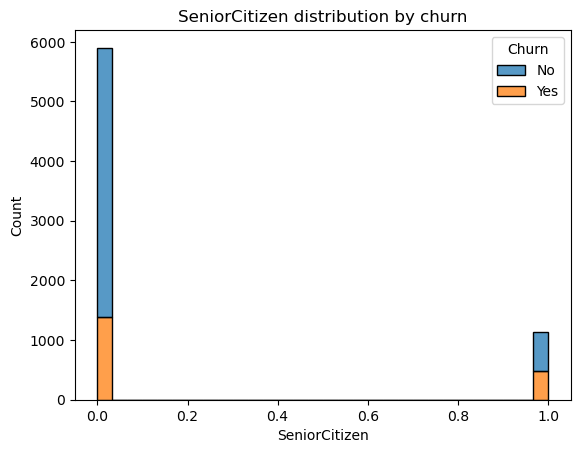

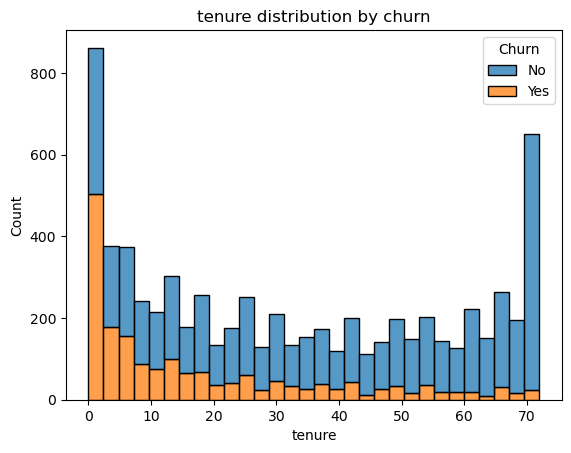

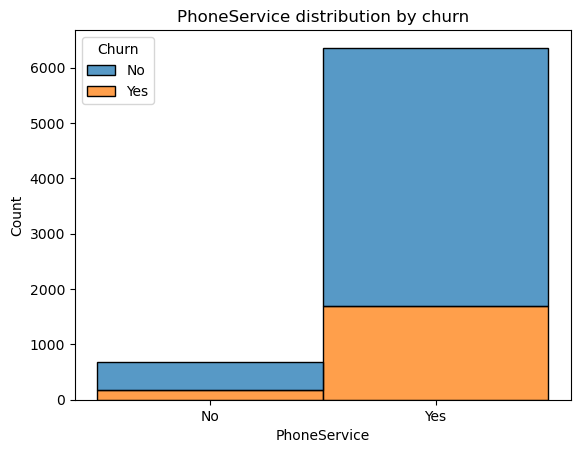

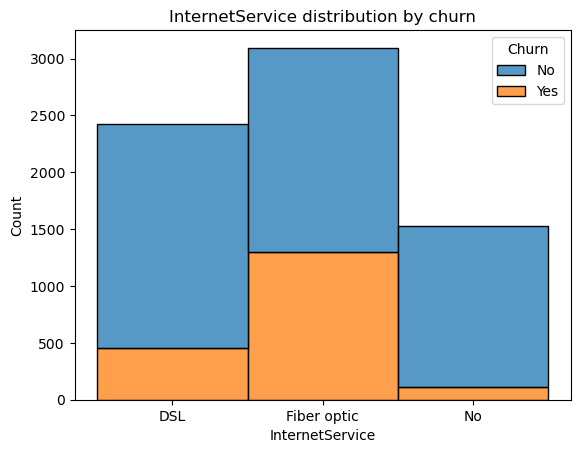

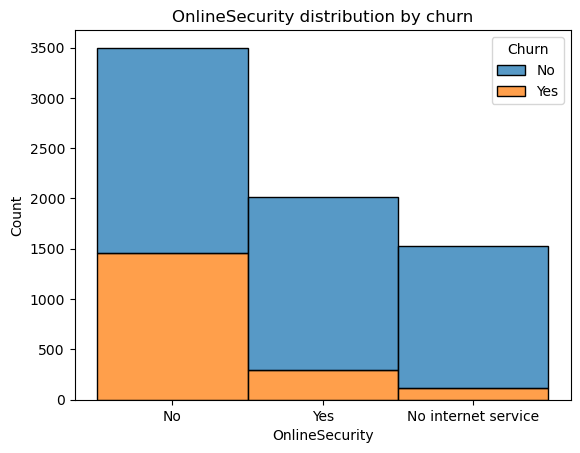

In [20]:
for column in ['gender','SeniorCitizen','tenure','PhoneService','InternetService','OnlineSecurity']:
    sns.histplot(data=d_f,x=column,hue='Churn',multiple='stack',bins=30)
    plt.title(f'{column} distribution by churn')
    plt.show()

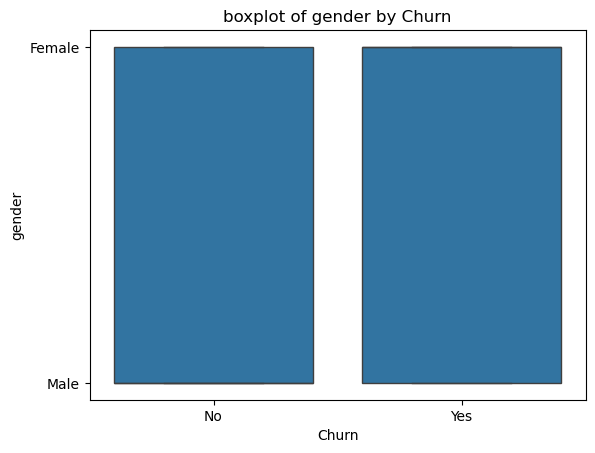

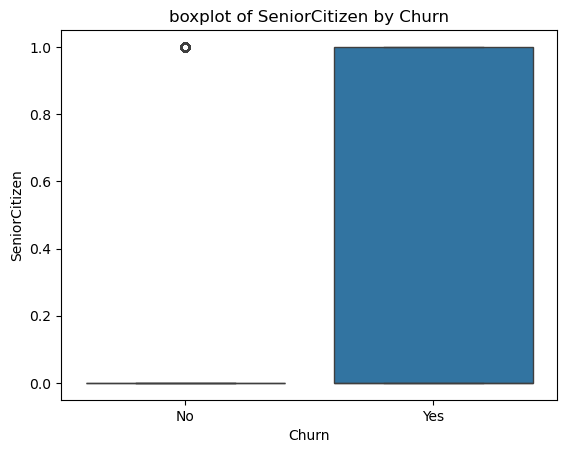

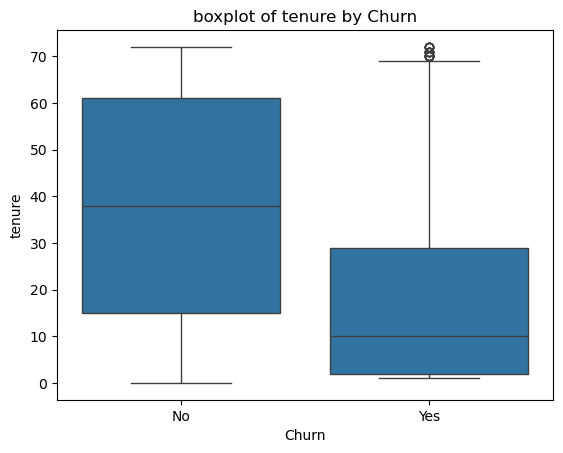

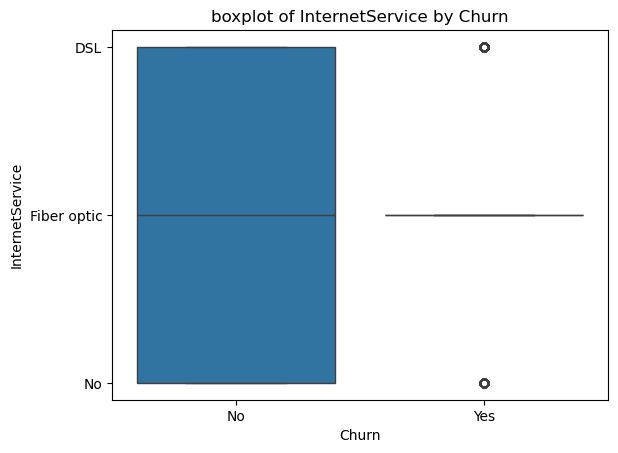

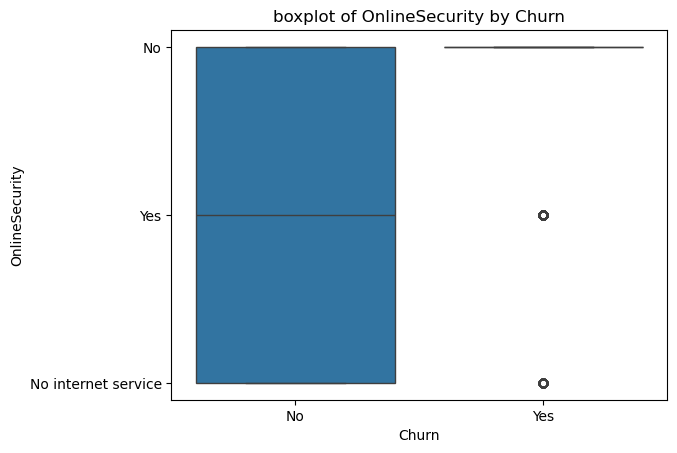

In [22]:
for column in ['gender','SeniorCitizen','tenure','InternetService','OnlineSecurity']:
    sns.boxplot(x='Churn',y=column,data=d_f)
    plt.title(f'boxplot of {column} by Churn')
    plt.show()

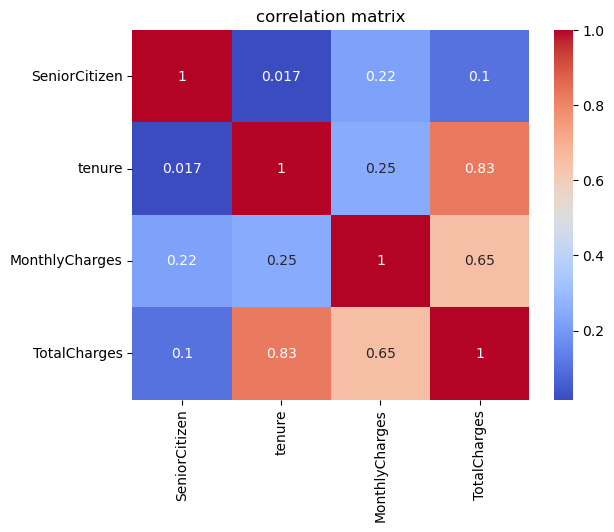

In [26]:
num_cols=list()
for column in d_f.columns:
    if d_f[column].dtype!=object:
        num_cols.append(column)
corrmatrix=d_f[num_cols].corr()
sns.heatmap(corrmatrix,annot=True,cmap='coolwarm')
plt.title("correlation matrix")
plt.show()

In [28]:
#data preprocessing 
#encoding variables
label_encoders2={}
for column in ['gender','SeniorCitizen','tenure','PhoneService','InternetService','OnlineSecurity']:
    le=LabelEncoder()
    d_f[column]=le.fit_transform(d_f[column])
    label_encoders2[column]=le

In [30]:
d_f.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,0,No phone service,0,0,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,1,No,0,2,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,1,No,0,2,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,0,No phone service,0,2,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,1,No,1,0,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


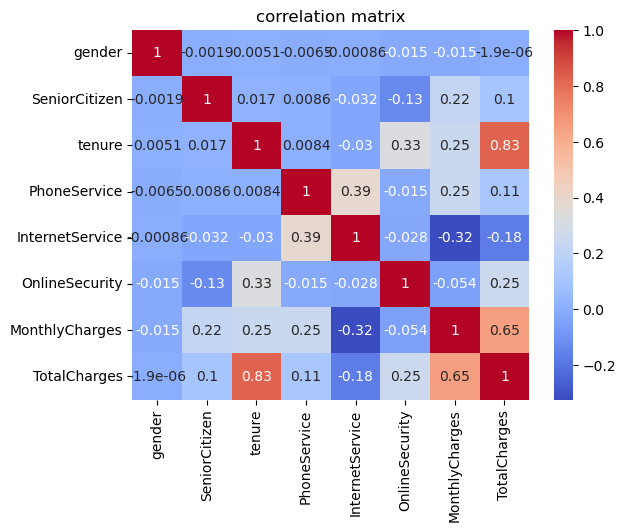

In [32]:
num_cols=list()
for column in d_f.columns:
    if d_f[column].dtype!=object:
        num_cols.append(column)
corrmatrix=d_f[num_cols].corr()
sns.heatmap(corrmatrix,annot=True,cmap='coolwarm')
plt.title("correlation matrix")
plt.show()

In [34]:
X1=d_f[ ['gender','SeniorCitizen','tenure','PhoneService','InternetService','OnlineSecurity']]
y1=d_f['Churn']

In [36]:
#split the data
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=0)

In [38]:
#feature scaling
scaler2=StandardScaler()
X1_train=scaler2.fit_transform(X1_train)
X1_test=scaler2.transform(X1_test)

In [40]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [42]:
my_model3=LogisticRegression()
my_model3.fit(X1_train,y1_train)
y_pred3=my_model3.predict(X1_test)
acc=accuracy_score(y1_test,y_pred3)

In [44]:
#display the accuracy scores and performance matrix
print(f'logistic regression : {acc*100:.2f}')
print('\n logistic regression classification report')
print(classification_report(y1_test,y_pred3))

logistic regression : 77.52

 logistic regression classification report
              precision    recall  f1-score   support

          No       0.81      0.90      0.86      1560
         Yes       0.60      0.42      0.49       553

    accuracy                           0.78      2113
   macro avg       0.71      0.66      0.67      2113
weighted avg       0.76      0.78      0.76      2113

